In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import os.path as path
import itertools
from sklearn.preprocessing import maxabs_scale

In [2]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Input,InputLayer, Dense, Activation, BatchNormalization, Flatten, Conv1D
from tensorflow.keras.layers import MaxPooling1D, Dropout
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint,LearningRateScheduler, \
                                        EarlyStopping
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical

In [3]:
os.environ['CUDA_VISIBLE_DEVICES'] = '3'

In [4]:
base_dir = path.join('..', 'data')
data_dir = path.join(base_dir, 'data_speech_commands_v0.02')
 
train_txt = path.join(data_dir, 'wav_train_16words.txt')
val_txt = path.join(data_dir, 'wav_validation_16words.txt')
test_txt = path.join(data_dir, 'wav_test_16words.txt')

train_data = np.load(path.join(data_dir, 'wav_train_data.npz'))
val_data = np.load(path.join(data_dir, 'wav_validation_data.npz'))
test_data = np.load(path.join(data_dir, 'wav_test_data.npz'))

In [5]:
x_train = train_data['x_train']
y_train = train_data['y_train']
x_val = val_data['x_val']
y_val = val_data['y_val']
x_test = test_data['x_test']
y_test = test_data['y_test']
y_table = test_data['table']

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape, y_table.shape

((36805, 16000, 1),
 (36805,),
 (4293, 16000, 1),
 (4293,),
 (4815, 16000, 1),
 (4815,),
 (16, 2))

In [6]:
input_shape = x_test[0].shape
output_size = y_table.shape[0]

In [7]:
x_train_abs = np.asarray([maxabs_scale(wav) for wav in x_train])
y_train_onehot = np.asarray([to_categorical(label, output_size) for label in y_train])
del x_train, y_train

x_val_abs = np.asarray([maxabs_scale(wav) for wav in x_val])
y_val_onehot = np.asarray([to_categorical(label, output_size) for label in y_val])
del x_val, y_val

x_test_abs = np.asarray([maxabs_scale(wav) for wav in x_test])
y_test_onehot = np.asarray([to_categorical(label, output_size) for label in y_test])
del x_test, y_test

In [8]:
def build_1d_cnn_custom_ch_32_BN_2(conv_num=1):
    model=Sequential()
    model.add(Conv1D (kernel_size=5, filters=32, strides=1, 
                      padding='same', input_shape=input_shape)) 
    model.add(BatchNormalization())
    model.add(Activation('relu'))
#     model.add(MaxPooling1D(pool_size=3, strides=3, padding='same'))
    
    for i in range(conv_num-1):
        model.add(Conv1D (kernel_size=5, filters=32*(2**int((i+1)/4)), 
                          strides=1, padding='same'))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        model.add(MaxPooling1D(pool_size=2, strides=2))

    model.add(Flatten())
    model.add(BatchNormalization())    
#     model.add(Dropout(0.5))
    model.add(Dense(output_size, activation='softmax' ))
    
    return model

In [9]:
for i in range(1, 14):
    model = build_1d_cnn_custom_ch_32_BN_2(conv_num=i)
    model.summary()
    del model

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 16000, 32)         192       
_________________________________________________________________
batch_normalization_v1 (Batc (None, 16000, 32)         128       
_________________________________________________________________
activation (Activation)      (None, 16000, 32)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512000)            0         
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 512000)            2048000   
_________________________________________________________________
dense (Dense)                (None, 16)                8192016   
Total params: 10,240,336
Trainable params: 9,216,272
Non-trainable par

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 16000, 32)         192       
_________________________________________________________________
batch_normalization_v1_20 (B (None, 16000, 32)         128       
_________________________________________________________________
activation_15 (Activation)   (None, 16000, 32)         0         
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 16000, 32)         5152      
_________________________________________________________________
batch_normalization_v1_21 (B (None, 16000, 32)         128       
_________________________________________________________________
activation_16 (Activation)   (None, 16000, 32)         0         
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 8000, 32)          0         
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_36 (Conv1D)           (None, 16000, 32)         192       
_________________________________________________________________
batch_normalization_v1_44 (B (None, 16000, 32)         128       
_________________________________________________________________
activation_36 (Activation)   (None, 16000, 32)         0         
_________________________________________________________________
conv1d_37 (Conv1D)           (None, 16000, 32)         5152      
_________________________________________________________________
batch_normalization_v1_45 (B (None, 16000, 32)         128       
_________________________________________________________________
activation_37 (Activation)   (None, 16000, 32)         0         
_________________________________________________________________
max_pooling1d_28 (MaxPooling (None, 8000, 32)          0         
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_55 (Conv1D)           (None, 16000, 32)         192       
_________________________________________________________________
batch_normalization_v1_65 (B (None, 16000, 32)         128       
_________________________________________________________________
activation_55 (Activation)   (None, 16000, 32)         0         
_________________________________________________________________
conv1d_56 (Conv1D)           (None, 16000, 32)         5152      
_________________________________________________________________
batch_normalization_v1_66 (B (None, 16000, 32)         128       
_________________________________________________________________
activation_56 (Activation)   (None, 16000, 32)         0         
_________________________________________________________________
max_pooling1d_45 (MaxPooling (None, 8000, 32)          0         
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_78 (Conv1D)           (None, 16000, 32)         192       
_________________________________________________________________
batch_normalization_v1_90 (B (None, 16000, 32)         128       
_________________________________________________________________
activation_78 (Activation)   (None, 16000, 32)         0         
_________________________________________________________________
conv1d_79 (Conv1D)           (None, 16000, 32)         5152      
_________________________________________________________________
batch_normalization_v1_91 (B (None, 16000, 32)         128       
_________________________________________________________________
activation_79 (Activation)   (None, 16000, 32)         0         
_________________________________________________________________
max_pooling1d_66 (MaxPooling (None, 8000, 32)          0         
__________

Train on 36805 samples, validate on 4293 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 2.4825 - acc: 0.3888
Epoch 00001: val_loss improved from inf to 2.36079, saving model to model/checkpoint/1D_CNN_custom_pool_2_ch_32_BN_3_conv_checkpoint/001-2.3608.hdf5
36805/36805 [==============================] - 52s 1ms/sample - loss: 2.4827 - acc: 0.3888 - val_loss: 2.3608 - val_acc: 0.3392
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.8425 - acc: 0.7620
Epoch 00002: val_loss did not improve from 2.36079
36805/36805 [==============================] - 47s 1ms/sample - loss: 0.8426 - acc: 0.7619 - val_loss: 2.4083 - val_acc: 0.4232
Epoch 3/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.3540 - acc: 0.9114
Epoch 00003: val_loss improved from 2.36079 to 2.29884, saving model to model/checkpoint/1D_CNN_custom_pool_2_ch_32_BN_3_conv_checkpoint/003-2.2988.hdf5
36805/

Epoch 29/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0623 - acc: 0.9882
Epoch 00029: val_loss did not improve from 2.29884
36805/36805 [==============================] - 47s 1ms/sample - loss: 0.0624 - acc: 0.9882 - val_loss: 4.4315 - val_acc: 0.4642
Epoch 30/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0561 - acc: 0.9902
Epoch 00030: val_loss did not improve from 2.29884
36805/36805 [==============================] - 47s 1ms/sample - loss: 0.0564 - acc: 0.9902 - val_loss: 4.9427 - val_acc: 0.4342
Epoch 31/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0638 - acc: 0.9878
Epoch 00031: val_loss did not improve from 2.29884
36805/36805 [==============================] - 47s 1ms/sample - loss: 0.0641 - acc: 0.9878 - val_loss: 4.5393 - val_acc: 0.4628
Epoch 32/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0471 - acc: 0.9920
Epoch 00032: val_loss did not improve from 2.29884
36805/36805 [===========

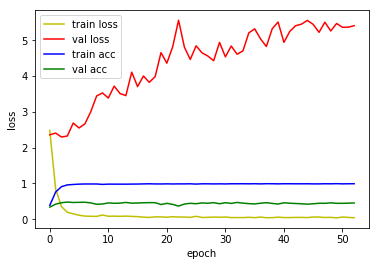

4815/4815 [==============================] - 3s 540us/sample - loss: 2.4626 - acc: 0.4326
Loss: 2.462566647128524 Accuracy: 0.43260643

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 2.1258 - acc: 0.4157
Epoch 00001: val_loss improved from inf to 2.19438, saving model to model/checkpoint/1D_CNN_custom_pool_2_ch_32_BN_4_conv_checkpoint/001-2.1944.hdf5
36805/36805 [==============================] - 55s 1ms/sample - loss: 2.1258 - acc: 0.4157 - val_loss: 2.1944 - val_acc: 0.3913
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.9862 - acc: 0.7062
Epoch 00002: val_loss improved from 2.19438 to 1.60145, saving model to model/checkpoint/1D_CNN_custom_pool_2_ch_32_BN_4_conv_checkpoint/002-1.6014.hdf5
36805/36805 [==============================] - 50s 1ms/sample - loss: 0.9863 - acc: 0.7062 - val_loss: 1.6014 - val_acc: 0.5579
Epoch 3/500
36800/36805 [============================>.] - ETA: 0

36800/36805 [============================>.] - ETA: 0s - loss: 0.0324 - acc: 0.9935
Epoch 00029: val_loss did not improve from 1.60145
36805/36805 [==============================] - 49s 1ms/sample - loss: 0.0328 - acc: 0.9935 - val_loss: 2.8725 - val_acc: 0.5441
Epoch 30/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0431 - acc: 0.9911
Epoch 00030: val_loss did not improve from 1.60145
36805/36805 [==============================] - 49s 1ms/sample - loss: 0.0434 - acc: 0.9911 - val_loss: 2.7615 - val_acc: 0.5577
Epoch 31/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0244 - acc: 0.9960
Epoch 00031: val_loss did not improve from 1.60145
36805/36805 [==============================] - 49s 1ms/sample - loss: 0.0244 - acc: 0.9959 - val_loss: 2.8409 - val_acc: 0.5469
Epoch 32/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0216 - acc: 0.9968
Epoch 00032: val_loss did not improve from 1.60145
36805/36805 [========================

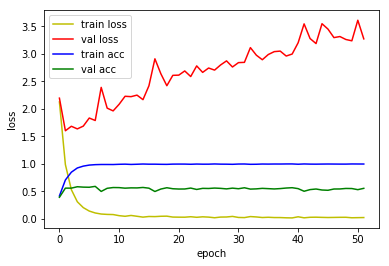

4815/4815 [==============================] - 3s 595us/sample - loss: 1.8428 - acc: 0.4933
Loss: 1.8428133879866555 Accuracy: 0.49325025

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 2.0154 - acc: 0.4495
Epoch 00001: val_loss improved from inf to 1.85120, saving model to model/checkpoint/1D_CNN_custom_pool_2_ch_32_BN_5_conv_checkpoint/001-1.8512.hdf5
36805/36805 [==============================] - 62s 2ms/sample - loss: 2.0153 - acc: 0.4495 - val_loss: 1.8512 - val_acc: 0.4503
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.9645 - acc: 0.7141
Epoch 00002: val_loss did not improve from 1.85120
36805/36805 [==============================] - 54s 1ms/sample - loss: 0.9649 - acc: 0.7140 - val_loss: 1.9953 - val_acc: 0.4945
Epoch 3/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.5428 - acc: 0.8371
Epoch 00003: val_loss did not improve from 1.85120
36805/36805 [======

Epoch 29/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0344 - acc: 0.9932
Epoch 00029: val_loss did not improve from 1.52244
36805/36805 [==============================] - 54s 1ms/sample - loss: 0.0344 - acc: 0.9932 - val_loss: 2.4499 - val_acc: 0.6068
Epoch 30/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0238 - acc: 0.9966
Epoch 00030: val_loss did not improve from 1.52244
36805/36805 [==============================] - 54s 1ms/sample - loss: 0.0243 - acc: 0.9965 - val_loss: 2.5910 - val_acc: 0.5945
Epoch 31/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0399 - acc: 0.9909
Epoch 00031: val_loss did not improve from 1.52244
36805/36805 [==============================] - 54s 1ms/sample - loss: 0.0400 - acc: 0.9908 - val_loss: 2.4830 - val_acc: 0.6052
Epoch 32/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0239 - acc: 0.9951
Epoch 00032: val_loss did not improve from 1.52244
36805/36805 [===========

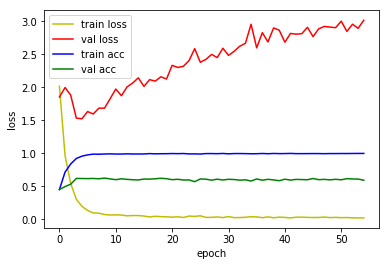

4815/4815 [==============================] - 3s 687us/sample - loss: 1.6488 - acc: 0.5823
Loss: 1.648780586588296 Accuracy: 0.58234686

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.8866 - acc: 0.4481
Epoch 00001: val_loss improved from inf to 1.63336, saving model to model/checkpoint/1D_CNN_custom_pool_2_ch_32_BN_6_conv_checkpoint/001-1.6334.hdf5
36805/36805 [==============================] - 69s 2ms/sample - loss: 1.8866 - acc: 0.4480 - val_loss: 1.6334 - val_acc: 0.4976
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.0850 - acc: 0.6761
Epoch 00002: val_loss improved from 1.63336 to 1.24425, saving model to model/checkpoint/1D_CNN_custom_pool_2_ch_32_BN_6_conv_checkpoint/002-1.2442.hdf5
36805/36805 [==============================] - 57s 2ms/sample - loss: 1.0851 - acc: 0.6761 - val_loss: 1.2442 - val_acc: 0.6476
Epoch 3/500
36800/36805 [============================>.] - ETA: 0

Epoch 29/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0325 - acc: 0.9939
Epoch 00029: val_loss did not improve from 1.15070
36805/36805 [==============================] - 56s 2ms/sample - loss: 0.0325 - acc: 0.9938 - val_loss: 1.6736 - val_acc: 0.6862
Epoch 30/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0235 - acc: 0.9960
Epoch 00030: val_loss did not improve from 1.15070
36805/36805 [==============================] - 56s 2ms/sample - loss: 0.0235 - acc: 0.9960 - val_loss: 1.7168 - val_acc: 0.6741
Epoch 31/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0169 - acc: 0.9985
Epoch 00031: val_loss did not improve from 1.15070
36805/36805 [==============================] - 56s 2ms/sample - loss: 0.0170 - acc: 0.9985 - val_loss: 1.7084 - val_acc: 0.6869
Epoch 32/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0316 - acc: 0.9944
Epoch 00032: val_loss did not improve from 1.15070
36805/36805 [===========

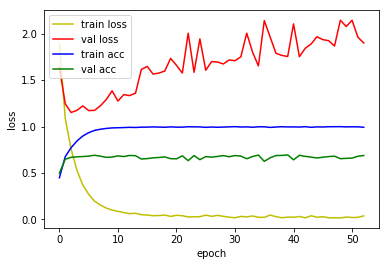

4815/4815 [==============================] - 3s 720us/sample - loss: 1.3158 - acc: 0.6451
Loss: 1.3158366868800464 Accuracy: 0.6450675

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.8191 - acc: 0.4498
Epoch 00001: val_loss improved from inf to 1.51706, saving model to model/checkpoint/1D_CNN_custom_pool_2_ch_32_BN_7_conv_checkpoint/001-1.5171.hdf5
36805/36805 [==============================] - 74s 2ms/sample - loss: 1.8191 - acc: 0.4498 - val_loss: 1.5171 - val_acc: 0.5134
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.1400 - acc: 0.6557
Epoch 00002: val_loss improved from 1.51706 to 1.16175, saving model to model/checkpoint/1D_CNN_custom_pool_2_ch_32_BN_7_conv_checkpoint/002-1.1617.hdf5
36805/36805 [==============================] - 58s 2ms/sample - loss: 1.1403 - acc: 0.6557 - val_loss: 1.1617 - val_acc: 0.6562
Epoch 3/500
36800/36805 [============================>.] - ETA: 0

Epoch 29/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0420 - acc: 0.9934
Epoch 00029: val_loss did not improve from 0.89792
36805/36805 [==============================] - 57s 2ms/sample - loss: 0.0422 - acc: 0.9933 - val_loss: 1.1670 - val_acc: 0.7598
Epoch 30/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0448 - acc: 0.9918
Epoch 00030: val_loss did not improve from 0.89792
36805/36805 [==============================] - 58s 2ms/sample - loss: 0.0451 - acc: 0.9917 - val_loss: 1.1417 - val_acc: 0.7582
Epoch 31/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0586 - acc: 0.9885
Epoch 00031: val_loss did not improve from 0.89792
36805/36805 [==============================] - 57s 2ms/sample - loss: 0.0586 - acc: 0.9885 - val_loss: 1.1786 - val_acc: 0.7491
Epoch 32/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0302 - acc: 0.9961
Epoch 00032: val_loss did not improve from 0.89792
36805/36805 [===========

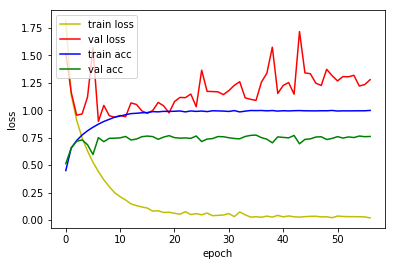

4815/4815 [==============================] - 4s 815us/sample - loss: 0.9934 - acc: 0.7148
Loss: 0.9933747239078193 Accuracy: 0.7148494

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.8737 - acc: 0.4288
Epoch 00001: val_loss improved from inf to 1.58942, saving model to model/checkpoint/1D_CNN_custom_pool_2_ch_32_BN_8_conv_checkpoint/001-1.5894.hdf5
36805/36805 [==============================] - 80s 2ms/sample - loss: 1.8737 - acc: 0.4288 - val_loss: 1.5894 - val_acc: 0.5076
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.1698 - acc: 0.6490
Epoch 00002: val_loss improved from 1.58942 to 1.10118, saving model to model/checkpoint/1D_CNN_custom_pool_2_ch_32_BN_8_conv_checkpoint/002-1.1012.hdf5
36805/36805 [==============================] - 59s 2ms/sample - loss: 1.1699 - acc: 0.6490 - val_loss: 1.1012 - val_acc: 0.6716
Epoch 3/500
36800/36805 [============================>.] - ETA: 0

36800/36805 [============================>.] - ETA: 0s - loss: 0.0751 - acc: 0.9852
Epoch 00027: val_loss did not improve from 0.66895
36805/36805 [==============================] - 58s 2ms/sample - loss: 0.0751 - acc: 0.9851 - val_loss: 0.8519 - val_acc: 0.7978
Epoch 28/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0757 - acc: 0.9844
Epoch 00028: val_loss did not improve from 0.66895
36805/36805 [==============================] - 58s 2ms/sample - loss: 0.0757 - acc: 0.9844 - val_loss: 0.7079 - val_acc: 0.8307
Epoch 29/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0614 - acc: 0.9880
Epoch 00029: val_loss did not improve from 0.66895
36805/36805 [==============================] - 59s 2ms/sample - loss: 0.0617 - acc: 0.9880 - val_loss: 0.8189 - val_acc: 0.8018
Epoch 30/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0675 - acc: 0.9859
Epoch 00030: val_loss did not improve from 0.66895
36805/36805 [========================

Epoch 57/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0218 - acc: 0.9971
Epoch 00057: val_loss did not improve from 0.66895
36805/36805 [==============================] - 58s 2ms/sample - loss: 0.0221 - acc: 0.9971 - val_loss: 0.9113 - val_acc: 0.8137
Epoch 58/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0395 - acc: 0.9912
Epoch 00058: val_loss did not improve from 0.66895
36805/36805 [==============================] - 58s 2ms/sample - loss: 0.0396 - acc: 0.9912 - val_loss: 0.8727 - val_acc: 0.8150
Epoch 59/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0430 - acc: 0.9903
Epoch 00059: val_loss did not improve from 0.66895
36805/36805 [==============================] - 59s 2ms/sample - loss: 0.0430 - acc: 0.9903 - val_loss: 0.8137 - val_acc: 0.8323
Epoch 60/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0191 - acc: 0.9979
Epoch 00060: val_loss did not improve from 0.66895
36805/36805 [===========

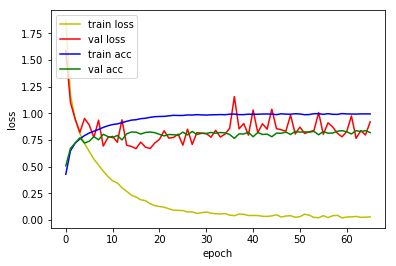

4815/4815 [==============================] - 4s 867us/sample - loss: 0.7487 - acc: 0.7931
Loss: 0.7487056278613002 Accuracy: 0.79314643

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.8014 - acc: 0.4492
Epoch 00001: val_loss improved from inf to 1.55011, saving model to model/checkpoint/1D_CNN_custom_pool_2_ch_32_BN_9_conv_checkpoint/001-1.5501.hdf5
36805/36805 [==============================] - 87s 2ms/sample - loss: 1.8015 - acc: 0.4492 - val_loss: 1.5501 - val_acc: 0.5029
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.0602 - acc: 0.6840
Epoch 00002: val_loss improved from 1.55011 to 1.10731, saving model to model/checkpoint/1D_CNN_custom_pool_2_ch_32_BN_9_conv_checkpoint/002-1.1073.hdf5
36805/36805 [==============================] - 60s 2ms/sample - loss: 1.0602 - acc: 0.6840 - val_loss: 1.1073 - val_acc: 0.6657
Epoch 3/500
36800/36805 [============================>.] - ETA: 

Epoch 26/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0649 - acc: 0.9852
Epoch 00026: val_loss did not improve from 0.41595
36805/36805 [==============================] - 60s 2ms/sample - loss: 0.0649 - acc: 0.9852 - val_loss: 0.4817 - val_acc: 0.8765
Epoch 27/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0472 - acc: 0.9909
Epoch 00027: val_loss did not improve from 0.41595
36805/36805 [==============================] - 60s 2ms/sample - loss: 0.0474 - acc: 0.9908 - val_loss: 0.4595 - val_acc: 0.8854
Epoch 28/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0677 - acc: 0.9837
Epoch 00028: val_loss did not improve from 0.41595
36805/36805 [==============================] - 60s 2ms/sample - loss: 0.0682 - acc: 0.9836 - val_loss: 0.4843 - val_acc: 0.8765
Epoch 29/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0685 - acc: 0.9833
Epoch 00029: val_loss did not improve from 0.41595
36805/36805 [===========

Epoch 56/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0314 - acc: 0.9926
Epoch 00056: val_loss did not improve from 0.41595
36805/36805 [==============================] - 60s 2ms/sample - loss: 0.0315 - acc: 0.9926 - val_loss: 0.4588 - val_acc: 0.8982
Epoch 57/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0229 - acc: 0.9953
Epoch 00057: val_loss did not improve from 0.41595
36805/36805 [==============================] - 60s 2ms/sample - loss: 0.0229 - acc: 0.9953 - val_loss: 0.4713 - val_acc: 0.8970
Epoch 58/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0153 - acc: 0.9975
Epoch 00058: val_loss did not improve from 0.41595
36805/36805 [==============================] - 60s 2ms/sample - loss: 0.0154 - acc: 0.9975 - val_loss: 0.4846 - val_acc: 0.8931
Epoch 59/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0340 - acc: 0.9913
Epoch 00059: val_loss did not improve from 0.41595
36805/36805 [===========

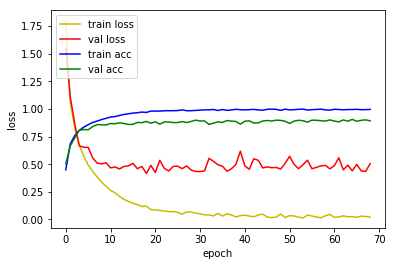

4815/4815 [==============================] - 4s 881us/sample - loss: 0.5148 - acc: 0.8590
Loss: 0.5148487983339177 Accuracy: 0.8589823

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.8998 - acc: 0.4218
Epoch 00001: val_loss improved from inf to 1.42441, saving model to model/checkpoint/1D_CNN_custom_pool_2_ch_32_BN_10_conv_checkpoint/001-1.4244.hdf5
36805/36805 [==============================] - 96s 3ms/sample - loss: 1.8996 - acc: 0.4219 - val_loss: 1.4244 - val_acc: 0.5488
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.0868 - acc: 0.6773
Epoch 00002: val_loss improved from 1.42441 to 1.09659, saving model to model/checkpoint/1D_CNN_custom_pool_2_ch_32_BN_10_conv_checkpoint/002-1.0966.hdf5
36805/36805 [==============================] - 62s 2ms/sample - loss: 1.0870 - acc: 0.6772 - val_loss: 1.0966 - val_acc: 0.6734
Epoch 3/500
36800/36805 [============================>.] - ETA:

36800/36805 [============================>.] - ETA: 0s - loss: 0.0483 - acc: 0.9882
Epoch 00025: val_loss did not improve from 0.27033
36805/36805 [==============================] - 62s 2ms/sample - loss: 0.0483 - acc: 0.9882 - val_loss: 0.3825 - val_acc: 0.8987
Epoch 26/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0478 - acc: 0.9880
Epoch 00026: val_loss did not improve from 0.27033
36805/36805 [==============================] - 62s 2ms/sample - loss: 0.0480 - acc: 0.9879 - val_loss: 0.2887 - val_acc: 0.9201
Epoch 27/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0629 - acc: 0.9830
Epoch 00027: val_loss did not improve from 0.27033
36805/36805 [==============================] - 62s 2ms/sample - loss: 0.0629 - acc: 0.9830 - val_loss: 0.2911 - val_acc: 0.9250
Epoch 28/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0335 - acc: 0.9927
Epoch 00028: val_loss did not improve from 0.27033
36805/36805 [========================

36800/36805 [============================>.] - ETA: 0s - loss: 0.0143 - acc: 0.9971
Epoch 00053: val_loss did not improve from 0.23800
36805/36805 [==============================] - 62s 2ms/sample - loss: 0.0143 - acc: 0.9971 - val_loss: 0.5164 - val_acc: 0.8919
Epoch 54/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0215 - acc: 0.9946
Epoch 00054: val_loss did not improve from 0.23800
36805/36805 [==============================] - 62s 2ms/sample - loss: 0.0215 - acc: 0.9946 - val_loss: 0.2615 - val_acc: 0.9366
Epoch 55/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0114 - acc: 0.9976
Epoch 00055: val_loss did not improve from 0.23800
36805/36805 [==============================] - 62s 2ms/sample - loss: 0.0115 - acc: 0.9976 - val_loss: 0.3543 - val_acc: 0.9192
Epoch 56/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0265 - acc: 0.9926
Epoch 00056: val_loss did not improve from 0.23800
36805/36805 [========================

Epoch 83/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0048 - acc: 0.9994
Epoch 00083: val_loss did not improve from 0.23800
36805/36805 [==============================] - 62s 2ms/sample - loss: 0.0049 - acc: 0.9994 - val_loss: 0.2935 - val_acc: 0.9392
Epoch 84/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0088 - acc: 0.9983
Epoch 00084: val_loss did not improve from 0.23800
36805/36805 [==============================] - 62s 2ms/sample - loss: 0.0088 - acc: 0.9983 - val_loss: 0.2859 - val_acc: 0.9371
Epoch 85/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0090 - acc: 0.9983
Epoch 00085: val_loss did not improve from 0.23800
36805/36805 [==============================] - 62s 2ms/sample - loss: 0.0091 - acc: 0.9983 - val_loss: 0.2674 - val_acc: 0.9378
Epoch 86/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0246 - acc: 0.9926
Epoch 00086: val_loss did not improve from 0.23800
36805/36805 [===========

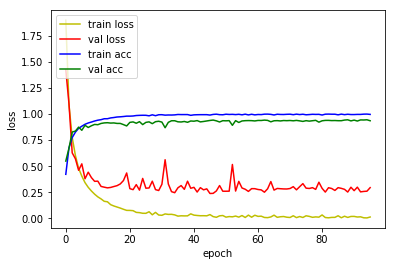

4815/4815 [==============================] - 4s 933us/sample - loss: 0.3260 - acc: 0.9178
Loss: 0.32596479585454224 Accuracy: 0.91775703

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.7593 - acc: 0.4621
Epoch 00001: val_loss improved from inf to 1.27142, saving model to model/checkpoint/1D_CNN_custom_pool_2_ch_32_BN_11_conv_checkpoint/001-1.2714.hdf5
36805/36805 [==============================] - 103s 3ms/sample - loss: 1.7592 - acc: 0.4621 - val_loss: 1.2714 - val_acc: 0.6038
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.8797 - acc: 0.7404
Epoch 00002: val_loss improved from 1.27142 to 0.67488, saving model to model/checkpoint/1D_CNN_custom_pool_2_ch_32_BN_11_conv_checkpoint/002-0.6749.hdf5
36805/36805 [==============================] - 63s 2ms/sample - loss: 0.8796 - acc: 0.7404 - val_loss: 0.6749 - val_acc: 0.8064
Epoch 3/500
36800/36805 [============================>.] - E

Epoch 25/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0409 - acc: 0.9898
Epoch 00025: val_loss did not improve from 0.20162
36805/36805 [==============================] - 63s 2ms/sample - loss: 0.0409 - acc: 0.9898 - val_loss: 0.2098 - val_acc: 0.9453
Epoch 26/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0283 - acc: 0.9936
Epoch 00026: val_loss did not improve from 0.20162
36805/36805 [==============================] - 63s 2ms/sample - loss: 0.0284 - acc: 0.9936 - val_loss: 0.2440 - val_acc: 0.9331
Epoch 27/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0398 - acc: 0.9901
Epoch 00027: val_loss did not improve from 0.20162
36805/36805 [==============================] - 63s 2ms/sample - loss: 0.0398 - acc: 0.9901 - val_loss: 0.2072 - val_acc: 0.9443
Epoch 28/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0255 - acc: 0.9943
Epoch 00028: val_loss did not improve from 0.20162
36805/36805 [===========

Epoch 54/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0278 - acc: 0.9921
Epoch 00054: val_loss improved from 0.19427 to 0.19090, saving model to model/checkpoint/1D_CNN_custom_pool_2_ch_32_BN_11_conv_checkpoint/054-0.1909.hdf5
36805/36805 [==============================] - 63s 2ms/sample - loss: 0.0278 - acc: 0.9921 - val_loss: 0.1909 - val_acc: 0.9485
Epoch 55/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0062 - acc: 0.9993
Epoch 00055: val_loss did not improve from 0.19090
36805/36805 [==============================] - 63s 2ms/sample - loss: 0.0065 - acc: 0.9993 - val_loss: 0.2125 - val_acc: 0.9455
Epoch 56/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0227 - acc: 0.9933
Epoch 00056: val_loss did not improve from 0.19090
36805/36805 [==============================] - 63s 2ms/sample - loss: 0.0227 - acc: 0.9933 - val_loss: 0.2104 - val_acc: 0.9471
Epoch 57/500
36800/36805 [============================>.] - ETA: 0s -

Epoch 83/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0125 - acc: 0.9961
Epoch 00083: val_loss did not improve from 0.18215
36805/36805 [==============================] - 63s 2ms/sample - loss: 0.0126 - acc: 0.9961 - val_loss: 0.2085 - val_acc: 0.9509
Epoch 84/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0083 - acc: 0.9981
Epoch 00084: val_loss did not improve from 0.18215
36805/36805 [==============================] - 63s 2ms/sample - loss: 0.0083 - acc: 0.9981 - val_loss: 0.2029 - val_acc: 0.9550
Epoch 85/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0057 - acc: 0.9988
Epoch 00085: val_loss did not improve from 0.18215
36805/36805 [==============================] - 63s 2ms/sample - loss: 0.0057 - acc: 0.9988 - val_loss: 0.2667 - val_acc: 0.9425
Epoch 86/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0049 - acc: 0.9989
Epoch 00086: val_loss did not improve from 0.18215
36805/36805 [===========

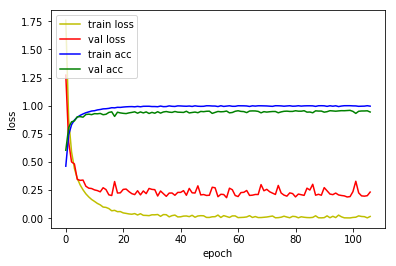

4815/4815 [==============================] - 5s 969us/sample - loss: 0.2282 - acc: 0.9443
Loss: 0.2282284504442881 Accuracy: 0.9443406

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.6728 - acc: 0.4854
Epoch 00001: val_loss improved from inf to 1.28050, saving model to model/checkpoint/1D_CNN_custom_pool_2_ch_32_BN_12_conv_checkpoint/001-1.2805.hdf5
36805/36805 [==============================] - 114s 3ms/sample - loss: 1.6726 - acc: 0.4855 - val_loss: 1.2805 - val_acc: 0.5952
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.7228 - acc: 0.7858
Epoch 00002: val_loss improved from 1.28050 to 0.64450, saving model to model/checkpoint/1D_CNN_custom_pool_2_ch_32_BN_12_conv_checkpoint/002-0.6445.hdf5
36805/36805 [==============================] - 64s 2ms/sample - loss: 0.7230 - acc: 0.7858 - val_loss: 0.6445 - val_acc: 0.8034
Epoch 3/500
36800/36805 [============================>.] - ETA

Epoch 27/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0441 - acc: 0.9877
Epoch 00027: val_loss improved from 0.16749 to 0.16099, saving model to model/checkpoint/1D_CNN_custom_pool_2_ch_32_BN_12_conv_checkpoint/027-0.1610.hdf5
36805/36805 [==============================] - 65s 2ms/sample - loss: 0.0441 - acc: 0.9877 - val_loss: 0.1610 - val_acc: 0.9536
Epoch 28/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0167 - acc: 0.9968
Epoch 00028: val_loss did not improve from 0.16099
36805/36805 [==============================] - 64s 2ms/sample - loss: 0.0168 - acc: 0.9967 - val_loss: 0.1653 - val_acc: 0.9543
Epoch 29/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0308 - acc: 0.9923
Epoch 00029: val_loss did not improve from 0.16099
36805/36805 [==============================] - 64s 2ms/sample - loss: 0.0308 - acc: 0.9923 - val_loss: 0.1875 - val_acc: 0.9520
Epoch 30/500
36800/36805 [============================>.] - ETA: 0s -

36800/36805 [============================>.] - ETA: 0s - loss: 0.0175 - acc: 0.9945
Epoch 00056: val_loss did not improve from 0.16099
36805/36805 [==============================] - 64s 2ms/sample - loss: 0.0177 - acc: 0.9944 - val_loss: 0.2353 - val_acc: 0.9462
Epoch 57/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0243 - acc: 0.9934
Epoch 00057: val_loss did not improve from 0.16099
36805/36805 [==============================] - 64s 2ms/sample - loss: 0.0244 - acc: 0.9933 - val_loss: 0.1856 - val_acc: 0.9553
Epoch 58/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0117 - acc: 0.9974
Epoch 00058: val_loss did not improve from 0.16099
36805/36805 [==============================] - 64s 2ms/sample - loss: 0.0117 - acc: 0.9974 - val_loss: 0.1800 - val_acc: 0.9520
Epoch 59/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0048 - acc: 0.9992
Epoch 00059: val_loss did not improve from 0.16099
36805/36805 [========================

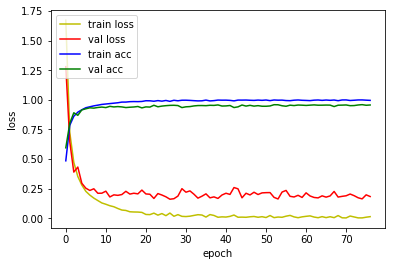

4815/4815 [==============================] - 5s 1ms/sample - loss: 0.2024 - acc: 0.9551
Loss: 0.20242220085454057 Accuracy: 0.9551402

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.5026 - acc: 0.5290
Epoch 00001: val_loss improved from inf to 1.02642, saving model to model/checkpoint/1D_CNN_custom_pool_2_ch_32_BN_13_conv_checkpoint/001-1.0264.hdf5
36805/36805 [==============================] - 121s 3ms/sample - loss: 1.5027 - acc: 0.5290 - val_loss: 1.0264 - val_acc: 0.6597
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.5821 - acc: 0.8201
Epoch 00002: val_loss improved from 1.02642 to 0.41555, saving model to model/checkpoint/1D_CNN_custom_pool_2_ch_32_BN_13_conv_checkpoint/002-0.4156.hdf5
36805/36805 [==============================] - 63s 2ms/sample - loss: 0.5821 - acc: 0.8201 - val_loss: 0.4156 - val_acc: 0.8654
Epoch 3/500
36800/36805 [============================>.] - ETA:

Epoch 27/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0258 - acc: 0.9931
Epoch 00027: val_loss improved from 0.17861 to 0.17551, saving model to model/checkpoint/1D_CNN_custom_pool_2_ch_32_BN_13_conv_checkpoint/027-0.1755.hdf5
36805/36805 [==============================] - 63s 2ms/sample - loss: 0.0259 - acc: 0.9931 - val_loss: 0.1755 - val_acc: 0.9541
Epoch 28/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0126 - acc: 0.9973
Epoch 00028: val_loss did not improve from 0.17551
36805/36805 [==============================] - 63s 2ms/sample - loss: 0.0126 - acc: 0.9973 - val_loss: 0.1869 - val_acc: 0.9539
Epoch 29/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0108 - acc: 0.9975
Epoch 00029: val_loss did not improve from 0.17551
36805/36805 [==============================] - 63s 2ms/sample - loss: 0.0108 - acc: 0.9975 - val_loss: 0.2307 - val_acc: 0.9411
Epoch 30/500
36800/36805 [============================>.] - ETA: 0s -

Epoch 56/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0212 - acc: 0.9936
Epoch 00056: val_loss improved from 0.17524 to 0.17410, saving model to model/checkpoint/1D_CNN_custom_pool_2_ch_32_BN_13_conv_checkpoint/056-0.1741.hdf5
36805/36805 [==============================] - 63s 2ms/sample - loss: 0.0212 - acc: 0.9936 - val_loss: 0.1741 - val_acc: 0.9574
Epoch 57/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0047 - acc: 0.9990
Epoch 00057: val_loss did not improve from 0.17410
36805/36805 [==============================] - 63s 2ms/sample - loss: 0.0047 - acc: 0.9990 - val_loss: 0.2138 - val_acc: 0.9520
Epoch 58/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0042 - acc: 0.9992
Epoch 00058: val_loss did not improve from 0.17410
36805/36805 [==============================] - 62s 2ms/sample - loss: 0.0042 - acc: 0.9991 - val_loss: 0.2278 - val_acc: 0.9485
Epoch 59/500
36800/36805 [============================>.] - ETA: 0s -

Epoch 85/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0030 - acc: 0.9993
Epoch 00085: val_loss did not improve from 0.17238
36805/36805 [==============================] - 62s 2ms/sample - loss: 0.0032 - acc: 0.9992 - val_loss: 0.2032 - val_acc: 0.9574
Epoch 86/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0145 - acc: 0.9958
Epoch 00086: val_loss did not improve from 0.17238
36805/36805 [==============================] - 63s 2ms/sample - loss: 0.0145 - acc: 0.9957 - val_loss: 0.1973 - val_acc: 0.9546
Epoch 87/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0093 - acc: 0.9972
Epoch 00087: val_loss improved from 0.17238 to 0.17172, saving model to model/checkpoint/1D_CNN_custom_pool_2_ch_32_BN_13_conv_checkpoint/087-0.1717.hdf5
36805/36805 [==============================] - 63s 2ms/sample - loss: 0.0094 - acc: 0.9972 - val_loss: 0.1717 - val_acc: 0.9611
Epoch 88/500
36800/36805 [============================>.] - ETA: 0s -

Epoch 114/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0040 - acc: 0.9988
Epoch 00114: val_loss did not improve from 0.17140
36805/36805 [==============================] - 62s 2ms/sample - loss: 0.0041 - acc: 0.9988 - val_loss: 0.2138 - val_acc: 0.9546
Epoch 115/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0132 - acc: 0.9960
Epoch 00115: val_loss did not improve from 0.17140
36805/36805 [==============================] - 63s 2ms/sample - loss: 0.0132 - acc: 0.9960 - val_loss: 0.2557 - val_acc: 0.9469
Epoch 116/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0018 - acc: 0.9995
Epoch 00116: val_loss did not improve from 0.17140
36805/36805 [==============================] - 63s 2ms/sample - loss: 0.0019 - acc: 0.9995 - val_loss: 0.1946 - val_acc: 0.9590
Epoch 117/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0084 - acc: 0.9976
Epoch 00117: val_loss did not improve from 0.17140
36805/36805 [=======

Epoch 144/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0162 - acc: 0.9954
Epoch 00144: val_loss did not improve from 0.17140
36805/36805 [==============================] - 63s 2ms/sample - loss: 0.0162 - acc: 0.9954 - val_loss: 0.2032 - val_acc: 0.9588
Epoch 145/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0015 - acc: 0.9996
Epoch 00145: val_loss did not improve from 0.17140
36805/36805 [==============================] - 62s 2ms/sample - loss: 0.0015 - acc: 0.9996 - val_loss: 0.1888 - val_acc: 0.9609
Epoch 146/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0013 - acc: 0.9997
Epoch 00146: val_loss did not improve from 0.17140
36805/36805 [==============================] - 63s 2ms/sample - loss: 0.0013 - acc: 0.9997 - val_loss: 0.1807 - val_acc: 0.9623
Epoch 147/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0013 - acc: 0.9997
Epoch 00147: val_loss did not improve from 0.17140
36805/36805 [=======

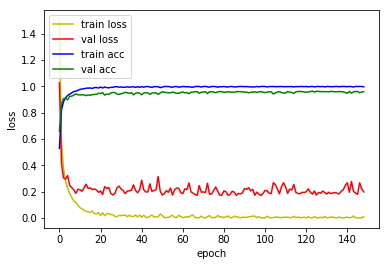

4815/4815 [==============================] - 5s 1ms/sample - loss: 0.2364 - acc: 0.9499
Loss: 0.23640183421598432 Accuracy: 0.9499481



In [10]:
for i in range(3, 14):
    base = '1D_CNN_custom_pool_2_ch_32_BN'
    model_name = base+'_{}_conv'.format(i)
    model = build_1d_cnn_custom_ch_32_BN_2(conv_num=i)
#         model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4),
          metrics=['accuracy'])
    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    os.makedirs(model_path, exist_ok=True)
    model_filename = model_path+'{epoch:03d}-{val_loss:.4f}.hdf5'
    checkpointer = ModelCheckpoint(filepath = model_filename, monitor = "val_loss", 
                                   verbose=1, save_best_only=True)

    early_stopping = EarlyStopping(monitor='val_loss', patience=50)
    hist = model.fit(x_train_abs, y_train_onehot, batch_size=64, epochs=500, 
                     validation_data=[x_val_abs, y_val_onehot], shuffle=True, 
                     callbacks = [checkpointer, early_stopping])

    print()
    print(model_name, 'Model')
    fig, ax = plt.subplots()
    ax.plot(hist.history['loss'], 'y', label='train loss')
    ax.plot(hist.history['val_loss'], 'r', label='val loss')
    ax.plot(hist.history['acc'], 'b', label='train acc')
    ax.plot(hist.history['val_acc'], 'g', label='val acc')
    ax.set_xlabel('epoch')
    ax.set_ylabel('loss')
    ax.legend(loc='upper left')
    plt.show()

    png_path = 'visualization/learning_curve/'
    filename = model_name+'.png'
    os.makedirs(png_path, exist_ok=True)
    fig.savefig(png_path+filename, transparent=True)

    model.save(model_path+'000_last.hdf5')
    del(model)

    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    model_filename = model_path + sorted(os.listdir(model_path))[-1]
    model = load_model(model_filename)
    [loss, accuracy] = model.evaluate(x_test_abs, y_test_onehot)
    print('Loss:', loss, 'Accuracy:', accuracy)
    print()

    del(model)

In [11]:
log_dir = 'log'
os.makedirs(log_dir, exist_ok=True)
base = '1D_CNN_custom_pool_2_ch_32_BN'

with open(path.join(log_dir, base), 'w') as log_file:
    for i in range(3, 14):
        model_name = base+'_{}_conv'.format(i)
        print()
        print(model_name, 'Model')
        model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
        model_filename = model_path + sorted(os.listdir(model_path))[-1]

        model = load_model(model_filename)
        model.summary()

        [loss, accuracy] = model.evaluate(x_test_abs, y_test_onehot)
        print('Loss:', loss, 'Accuracy:', accuracy)

        del(model)

        log_file.write('\t'.join([model_name, str(accuracy), str(loss)])+'\n')


1D_CNN_custom_pool_2_ch_32_BN_3_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_91 (Conv1D)           (None, 16000, 32)         192       
_________________________________________________________________
batch_normalization_v1_104 ( (None, 16000, 32)         128       
_________________________________________________________________
activation_91 (Activation)   (None, 16000, 32)         0         
_________________________________________________________________
conv1d_92 (Conv1D)           (None, 16000, 32)         5152      
_________________________________________________________________
batch_normalization_v1_105 ( (None, 16000, 32)         128       
_________________________________________________________________
activation_92 (Activation)   (None, 16000, 32)         0         
_________________________________________________________________
max_pooling1d_78 (MaxPooling (No

4815/4815 [==============================] - 5s 953us/sample - loss: 1.6488 - acc: 0.5823
Loss: 1.648780586588296 Accuracy: 0.58234686

1D_CNN_custom_pool_2_ch_32_BN_6_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_103 (Conv1D)          (None, 16000, 32)         192       
_________________________________________________________________
batch_normalization_v1_119 ( (None, 16000, 32)         128       
_________________________________________________________________
activation_103 (Activation)  (None, 16000, 32)         0         
_________________________________________________________________
conv1d_104 (Conv1D)          (None, 16000, 32)         5152      
_________________________________________________________________
batch_normalization_v1_120 ( (None, 16000, 32)         128       
_________________________________________________________________
activation_104 (Activation)  

4815/4815 [==============================] - 5s 1ms/sample - loss: 0.9934 - acc: 0.7148
Loss: 0.9933747239078193 Accuracy: 0.7148494

1D_CNN_custom_pool_2_ch_32_BN_8_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_116 (Conv1D)          (None, 16000, 32)         192       
_________________________________________________________________
batch_normalization_v1_134 ( (None, 16000, 32)         128       
_________________________________________________________________
activation_116 (Activation)  (None, 16000, 32)         0         
_________________________________________________________________
conv1d_117 (Conv1D)          (None, 16000, 32)         5152      
_________________________________________________________________
batch_normalization_v1_135 ( (None, 16000, 32)         128       
_________________________________________________________________
activation_117 (Activation)  (N

4815/4815 [==============================] - 5s 1ms/sample - loss: 0.5148 - acc: 0.8590
Loss: 0.5148487983339177 Accuracy: 0.8589823

1D_CNN_custom_pool_2_ch_32_BN_10_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_133 (Conv1D)          (None, 16000, 32)         192       
_________________________________________________________________
batch_normalization_v1_153 ( (None, 16000, 32)         128       
_________________________________________________________________
activation_133 (Activation)  (None, 16000, 32)         0         
_________________________________________________________________
conv1d_134 (Conv1D)          (None, 16000, 32)         5152      
_________________________________________________________________
batch_normalization_v1_154 ( (None, 16000, 32)         128       
_________________________________________________________________
activation_134 (Activation)  (

4815/4815 [==============================] - 6s 1ms/sample - loss: 0.2282 - acc: 0.9443
Loss: 0.2282284504442881 Accuracy: 0.9443406

1D_CNN_custom_pool_2_ch_32_BN_12_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_154 (Conv1D)          (None, 16000, 32)         192       
_________________________________________________________________
batch_normalization_v1_176 ( (None, 16000, 32)         128       
_________________________________________________________________
activation_154 (Activation)  (None, 16000, 32)         0         
_________________________________________________________________
conv1d_155 (Conv1D)          (None, 16000, 32)         5152      
_________________________________________________________________
batch_normalization_v1_177 ( (None, 16000, 32)         128       
_________________________________________________________________
activation_155 (Activation)  (

4815/4815 [==============================] - 6s 1ms/sample - loss: 0.2364 - acc: 0.9499
Loss: 0.23640183421598432 Accuracy: 0.9499481


In [12]:
# log_dir = 'log'
# os.makedirs(log_dir, exist_ok=True)

# with open(path.join(log_dir, base), 'w') as log_file:
for i in range(3, 14):
    model_name = base+'_{}_conv'.format(i)
    print()
    print(model_name, 'Model')
    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    model_filename = model_path + '000_last.hdf5'

    model = load_model(model_filename)
    model.summary()

    [loss, accuracy] = model.evaluate(x_test_abs, y_test_onehot)
    print('Loss:', loss, 'Accuracy:', accuracy)

    del(model)

#         log_file.write('\t'.join([model_name, str(accuracy), str(loss)])+'\n')


1D_CNN_custom_pool_2_ch_32_BN_3_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_91 (Conv1D)           (None, 16000, 32)         192       
_________________________________________________________________
batch_normalization_v1_104 ( (None, 16000, 32)         128       
_________________________________________________________________
activation_91 (Activation)   (None, 16000, 32)         0         
_________________________________________________________________
conv1d_92 (Conv1D)           (None, 16000, 32)         5152      
_________________________________________________________________
batch_normalization_v1_105 ( (None, 16000, 32)         128       
_________________________________________________________________
activation_92 (Activation)   (None, 16000, 32)         0         
_________________________________________________________________
max_pooling1d_78 (MaxPooling (No

4815/4815 [==============================] - 6s 1ms/sample - loss: 3.2840 - acc: 0.5593
Loss: 3.283971308820097 Accuracy: 0.55929387

1D_CNN_custom_pool_2_ch_32_BN_6_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_103 (Conv1D)          (None, 16000, 32)         192       
_________________________________________________________________
batch_normalization_v1_119 ( (None, 16000, 32)         128       
_________________________________________________________________
activation_103 (Activation)  (None, 16000, 32)         0         
_________________________________________________________________
conv1d_104 (Conv1D)          (None, 16000, 32)         5152      
_________________________________________________________________
batch_normalization_v1_120 ( (None, 16000, 32)         128       
_________________________________________________________________
activation_104 (Activation)  (N

4815/4815 [==============================] - 6s 1ms/sample - loss: 1.4783 - acc: 0.7290
Loss: 1.4783112845069275 Accuracy: 0.72897196

1D_CNN_custom_pool_2_ch_32_BN_8_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_116 (Conv1D)          (None, 16000, 32)         192       
_________________________________________________________________
batch_normalization_v1_134 ( (None, 16000, 32)         128       
_________________________________________________________________
activation_116 (Activation)  (None, 16000, 32)         0         
_________________________________________________________________
conv1d_117 (Conv1D)          (None, 16000, 32)         5152      
_________________________________________________________________
batch_normalization_v1_135 ( (None, 16000, 32)         128       
_________________________________________________________________
activation_117 (Activation)  (

4815/4815 [==============================] - 7s 1ms/sample - loss: 0.6554 - acc: 0.8656
Loss: 0.6554447114900884 Accuracy: 0.86562824

1D_CNN_custom_pool_2_ch_32_BN_10_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_133 (Conv1D)          (None, 16000, 32)         192       
_________________________________________________________________
batch_normalization_v1_153 ( (None, 16000, 32)         128       
_________________________________________________________________
activation_133 (Activation)  (None, 16000, 32)         0         
_________________________________________________________________
conv1d_134 (Conv1D)          (None, 16000, 32)         5152      
_________________________________________________________________
batch_normalization_v1_154 ( (None, 16000, 32)         128       
_________________________________________________________________
activation_134 (Activation)  

4815/4815 [==============================] - 7s 1ms/sample - loss: 0.2639 - acc: 0.9418
Loss: 0.26390035499026565 Accuracy: 0.9418484

1D_CNN_custom_pool_2_ch_32_BN_12_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_154 (Conv1D)          (None, 16000, 32)         192       
_________________________________________________________________
batch_normalization_v1_176 ( (None, 16000, 32)         128       
_________________________________________________________________
activation_154 (Activation)  (None, 16000, 32)         0         
_________________________________________________________________
conv1d_155 (Conv1D)          (None, 16000, 32)         5152      
_________________________________________________________________
batch_normalization_v1_177 ( (None, 16000, 32)         128       
_________________________________________________________________
activation_155 (Activation)  

4815/4815 [==============================] - 8s 2ms/sample - loss: 0.2428 - acc: 0.9495
Loss: 0.24282508008065995 Accuracy: 0.9495327
